# Data Analysis

### Project Proposal / Outline

Our project is to uncover patterns in worldwide suicide rates. We will examine the relationships between number of suicides across multiple countries, years, genders, ages and several demographic and socioeconomic factors in order to understand if there are underlying factors influencing suicide rates across the world.

### Team Members
* Ayala, Enrique
* Burnes, Javier
* Guarnieri, Richard
* Macias, Erick
* Rello, Carlos

### Setup

In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

# magic functions
%matplotlib inline

# seaborn style
sns.set(style='darkgrid')

### Import Data

In [2]:
# import cleaned_data.csv from DataCleaning.ipynb
cleaned_csv = pd.read_csv('cleaned_data.csv', dtype={'year': 'object'})

# load into DataFrame
df = pd.DataFrame(cleaned_csv)

# display df
df.head(3)

,country,year,sex,age,suicides,population,suicides/100k,generation,HDI,fertility_rate,...,GDP_pc_curr_LCU,GDP_pc_curr_US$,GDP_pc_PPP_constant_2011_intl_$,GDP_pc_PPP_current_intl_$,GDP_PPP_cons_2011_intl_$,GDP_PPP_curr_intl_$,GNI_curr_LCU,GNI_pc_curr_LCU,GNI_pc_Atlas_curr_US$,GNI_pc_PPP_curr_intl_$
0,Albania,1987,male,15-24 years,21,312900,6.71,Generation X,NaN,3.164,...,5398.34706,674.79338,NaN,NaN,NaN,NaN,1.664957e+10,5399.38481,730.0,NaN
1,Albania,1987,male,35-54 years,16,308000,5.19,Silent,NaN,3.164,...,5398.34706,674.79338,NaN,NaN,NaN,NaN,1.664957e+10,5399.38481,730.0,NaN
2,Albania,1987,female,15-24 years,14,289700,4.83,Generation X,NaN,3.164,...,5398.34706,674.79338,NaN,NaN,NaN,NaN,1.664957e+10,5399.38481,730.0,NaN


### Data Analysis

#### Histogram - Suicides per Country (1987-2015)

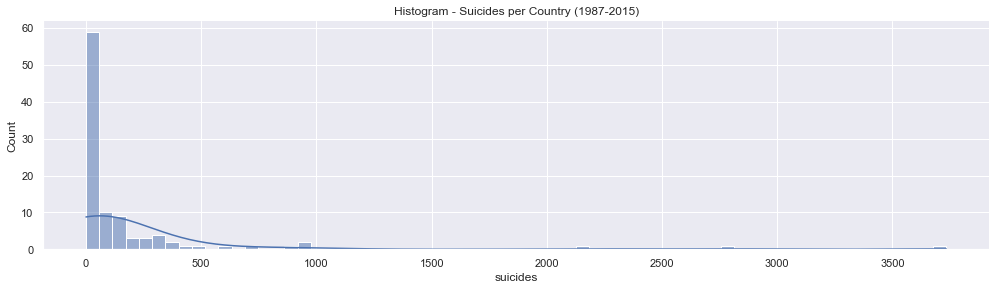

In [3]:
# create plot_df
plot_df = df.groupby(['country']).agg({'suicides': 'mean'})

#create plot
sns.displot(data=plot_df, x='suicides', kde=True, height=4, aspect=3.5)
plt.title('Histogram - Suicides per Country (1987-2015)')
plt.savefig("Images/histogram.png")
plt.show()

#### Plot - Suicides over the years (1987-2015)

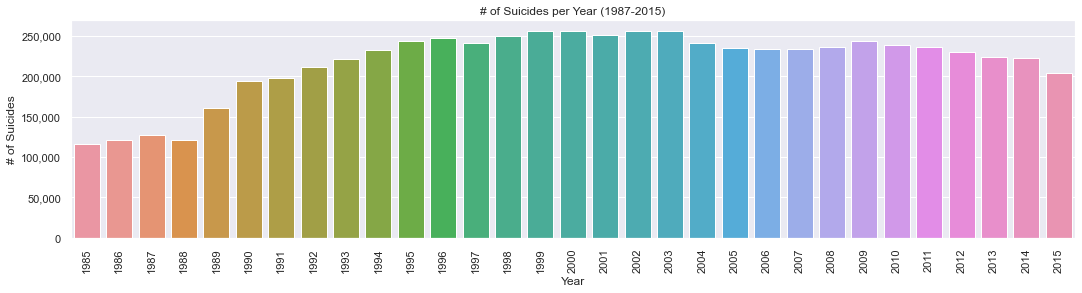

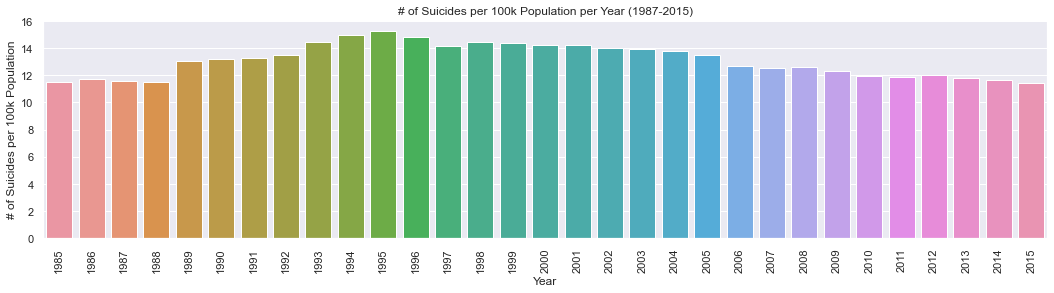

In [4]:
# create plot_df1
plot_df1 = df.groupby(['year']).agg({'suicides': 'sum'})

# create plot_df2
plot_df2 = df.groupby(['year']).agg({
    'suicides': 'sum', 
    'population': 'sum',
})
plot_df2['suicides/100k'] = (plot_df2['suicides'] / plot_df2['population']) * 100000

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df1,
            x=plot_df1.index.get_level_values('year'),
            y='suicides',
            estimator=np.sum,
            ci=None)
ax.set_title('# of Suicides per Year (1987-2015)')
ax.set_xlabel('Year')
ax.set_ylabel('# of Suicides')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_per_year.png")

plt.show()

#create plot
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(data=plot_df2,
            x=plot_df2.index.get_level_values('year'),
            y='suicides/100k',
            estimator=np.sum,
            ci=None)
ax.set_title('# of Suicides per 100k Population per Year (1987-2015)')
ax.set_xlabel('Year')
ax.set_ylabel('# of Suicides per 100k Population')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides100k_per_year.png")

plt.show()

#### Plot - # of Suicides per Country (1987-2015)

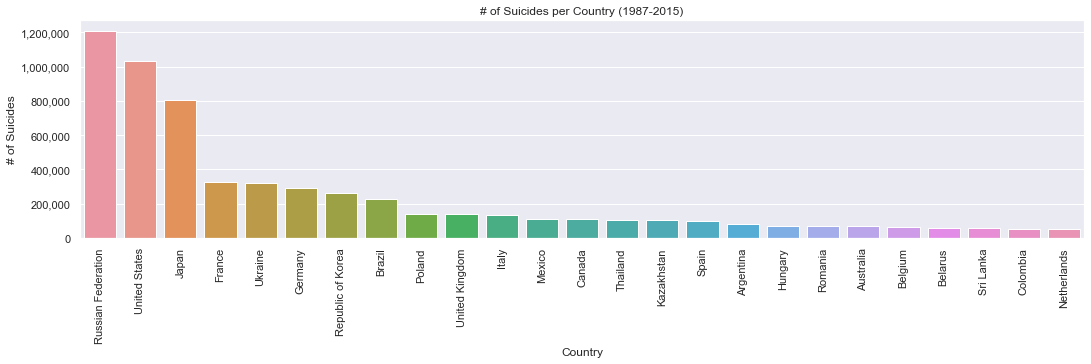

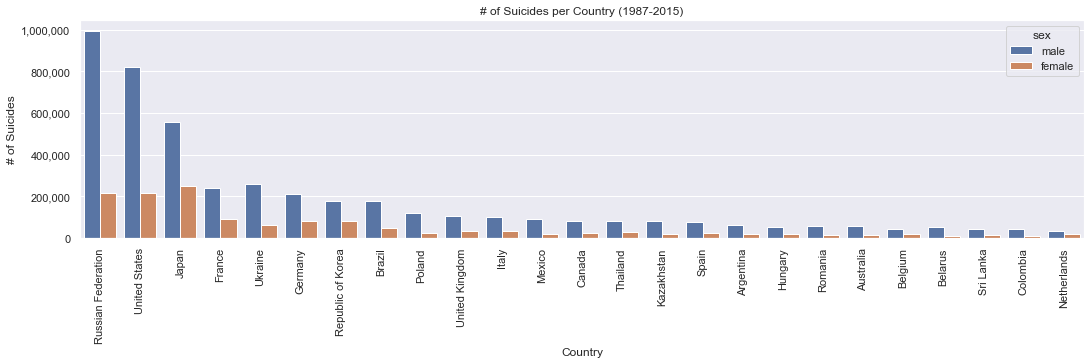

In [5]:
# create plot_df
plot_df = df.groupby(['country', 'sex']).agg({'suicides': 'sum'})
plot_df.reset_index(level=1, inplace=True)

# create order for plot_df
order = df.groupby(['country']).agg({'suicides': 'sum'}).sort_values(by='suicides', ascending=False).index

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df,
            x=plot_df.index.get_level_values('country'),
            y='suicides',
            estimator=np.sum,
            ci=None,
            order=order[:25])
ax.set_title('# of Suicides per Country (1987-2015)')
ax.set_xlabel('Country')
ax.set_ylabel('# of Suicides')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_per_country.png")

plt.show()

#create plot
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(data=plot_df,
            x=plot_df.index.get_level_values('country'),
            y='suicides',
            estimator=np.sum,
            ci=None,
            hue='sex',
            hue_order=['male', 'female'],
            order=order[:25])
ax.set_title('# of Suicides per Country (1987-2015)')
ax.set_xlabel('Country')
ax.set_ylabel('# of Suicides')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_per_country_hue.png")

plt.show()

#### Plot - # of Suicides per 100k Population per Country (1987-2015)

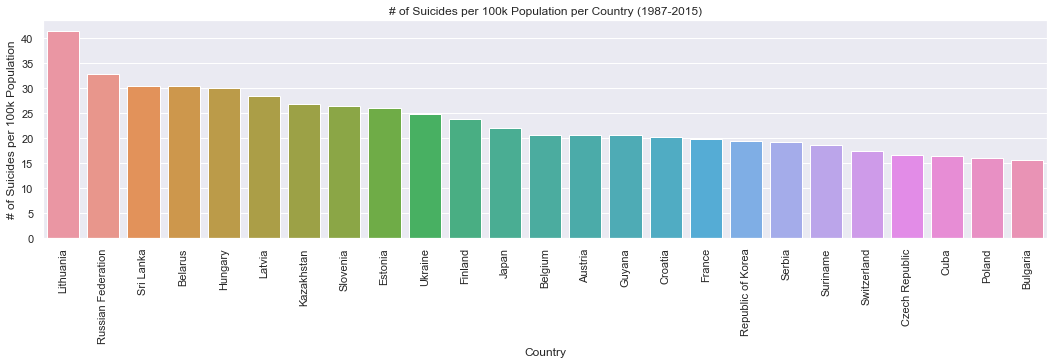

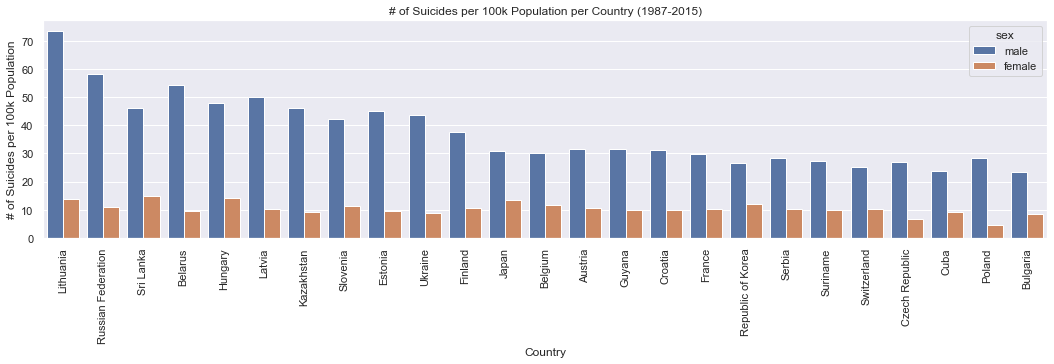

In [6]:
# create plot_df1
plot_df1 = df.groupby(['country']).agg({
    'suicides': 'sum', 
    'population': 'sum',
})
plot_df1['suicides/100k'] = (plot_df1['suicides'] / plot_df1['population']) * 100000

# create plot_df2
plot_df2 = df.groupby(['country', 'sex']).agg({
    'suicides': 'sum', 
    'population': 'sum',
})
plot_df2['suicides/100k'] = (plot_df2['suicides'] / plot_df2['population']) * 100000
plot_df2.reset_index(level=1, inplace=True)

# create an order for Seaborn plot
order = plot_df1.sort_values(by='suicides/100k', ascending=False).index

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df1,
            x=plot_df1.index.get_level_values('country'),
            y='suicides/100k',
            estimator=np.sum,
            ci=None,
            order=order[:25])
ax.set_title('# of Suicides per 100k Population per Country (1987-2015)')
ax.set_xlabel('Country')
ax.set_ylabel('# of Suicides per 100k Population')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides100k_per_country.png")

plt.show()

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df2,
            x=plot_df2.index.get_level_values('country'),
            y='suicides/100k',
            estimator=np.sum,
            ci=None,
            hue='sex',
            hue_order=['male', 'female'],
            order=order[:25])
ax.set_title('# of Suicides per 100k Population per Country (1987-2015)')
ax.set_xlabel('Country')
ax.set_ylabel('# of Suicides per 100k Population')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides100k_per_country_hue.png")

plt.show()

#### Plot - # of Suicides per 100k Population per Age Group

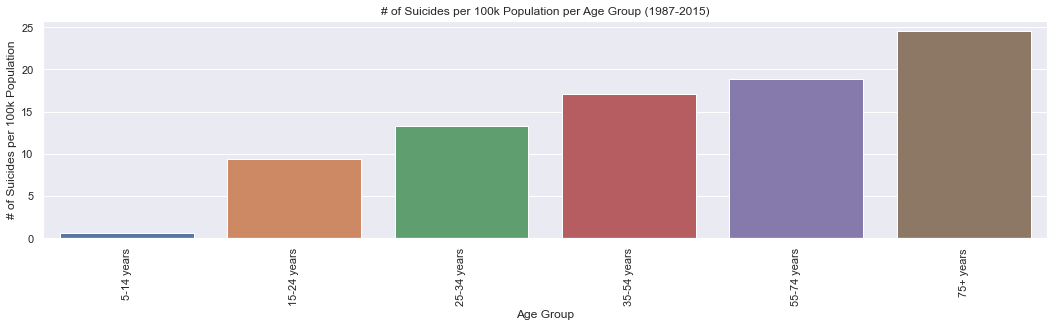

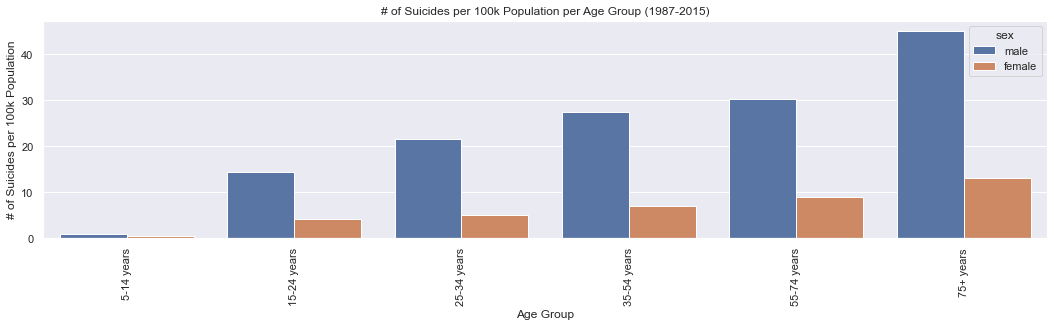

In [7]:
# create plot_df1
plot_df1 = df.groupby(['age']).agg({
    'suicides': 'sum', 
    'population': 'sum',
})
plot_df1['suicides/100k'] = (plot_df1['suicides'] / plot_df1['population']) * 100000

# create plot_df2
plot_df2 = df.groupby(['age', 'sex']).agg({
    'suicides': 'sum', 
    'population': 'sum',
})
plot_df2['suicides/100k'] = (plot_df2['suicides'] / plot_df2['population']) * 100000
plot_df2.reset_index(level=1, inplace=True)

# create an order for Seaborn plot
order = ['5-14 years',
         '15-24 years',
         '25-34 years',
         '35-54 years',
         '55-74 years',
         '75+ years']

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df1,
            x=plot_df1.index.get_level_values('age'),
            y='suicides/100k',
            estimator=np.mean,
            ci=None,
            order=order)
ax.set_title('# of Suicides per 100k Population per Age Group (1987-2015)')
ax.set_xlabel('Age Group')
ax.set_ylabel('# of Suicides per 100k Population')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides100k_per_age.png")

plt.show()

#create plot
fig, ax = plt.subplots(figsize=(18, 4))

sns.barplot(data=plot_df2,
            x=plot_df2.index.get_level_values('age'),
            y='suicides/100k',
            estimator=np.mean,
            ci=None,
            hue='sex',
            hue_order=['male', 'female'],
            order=order)
ax.set_title('# of Suicides per 100k Population per Age Group (1987-2015)')
ax.set_xlabel('Age Group')
ax.set_ylabel('# of Suicides per 100k Population')
plt.xticks(rotation=90)
# add format to y-axis
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides100k_per_age_hue.png")

plt.show()

#### Correlation Clustermap

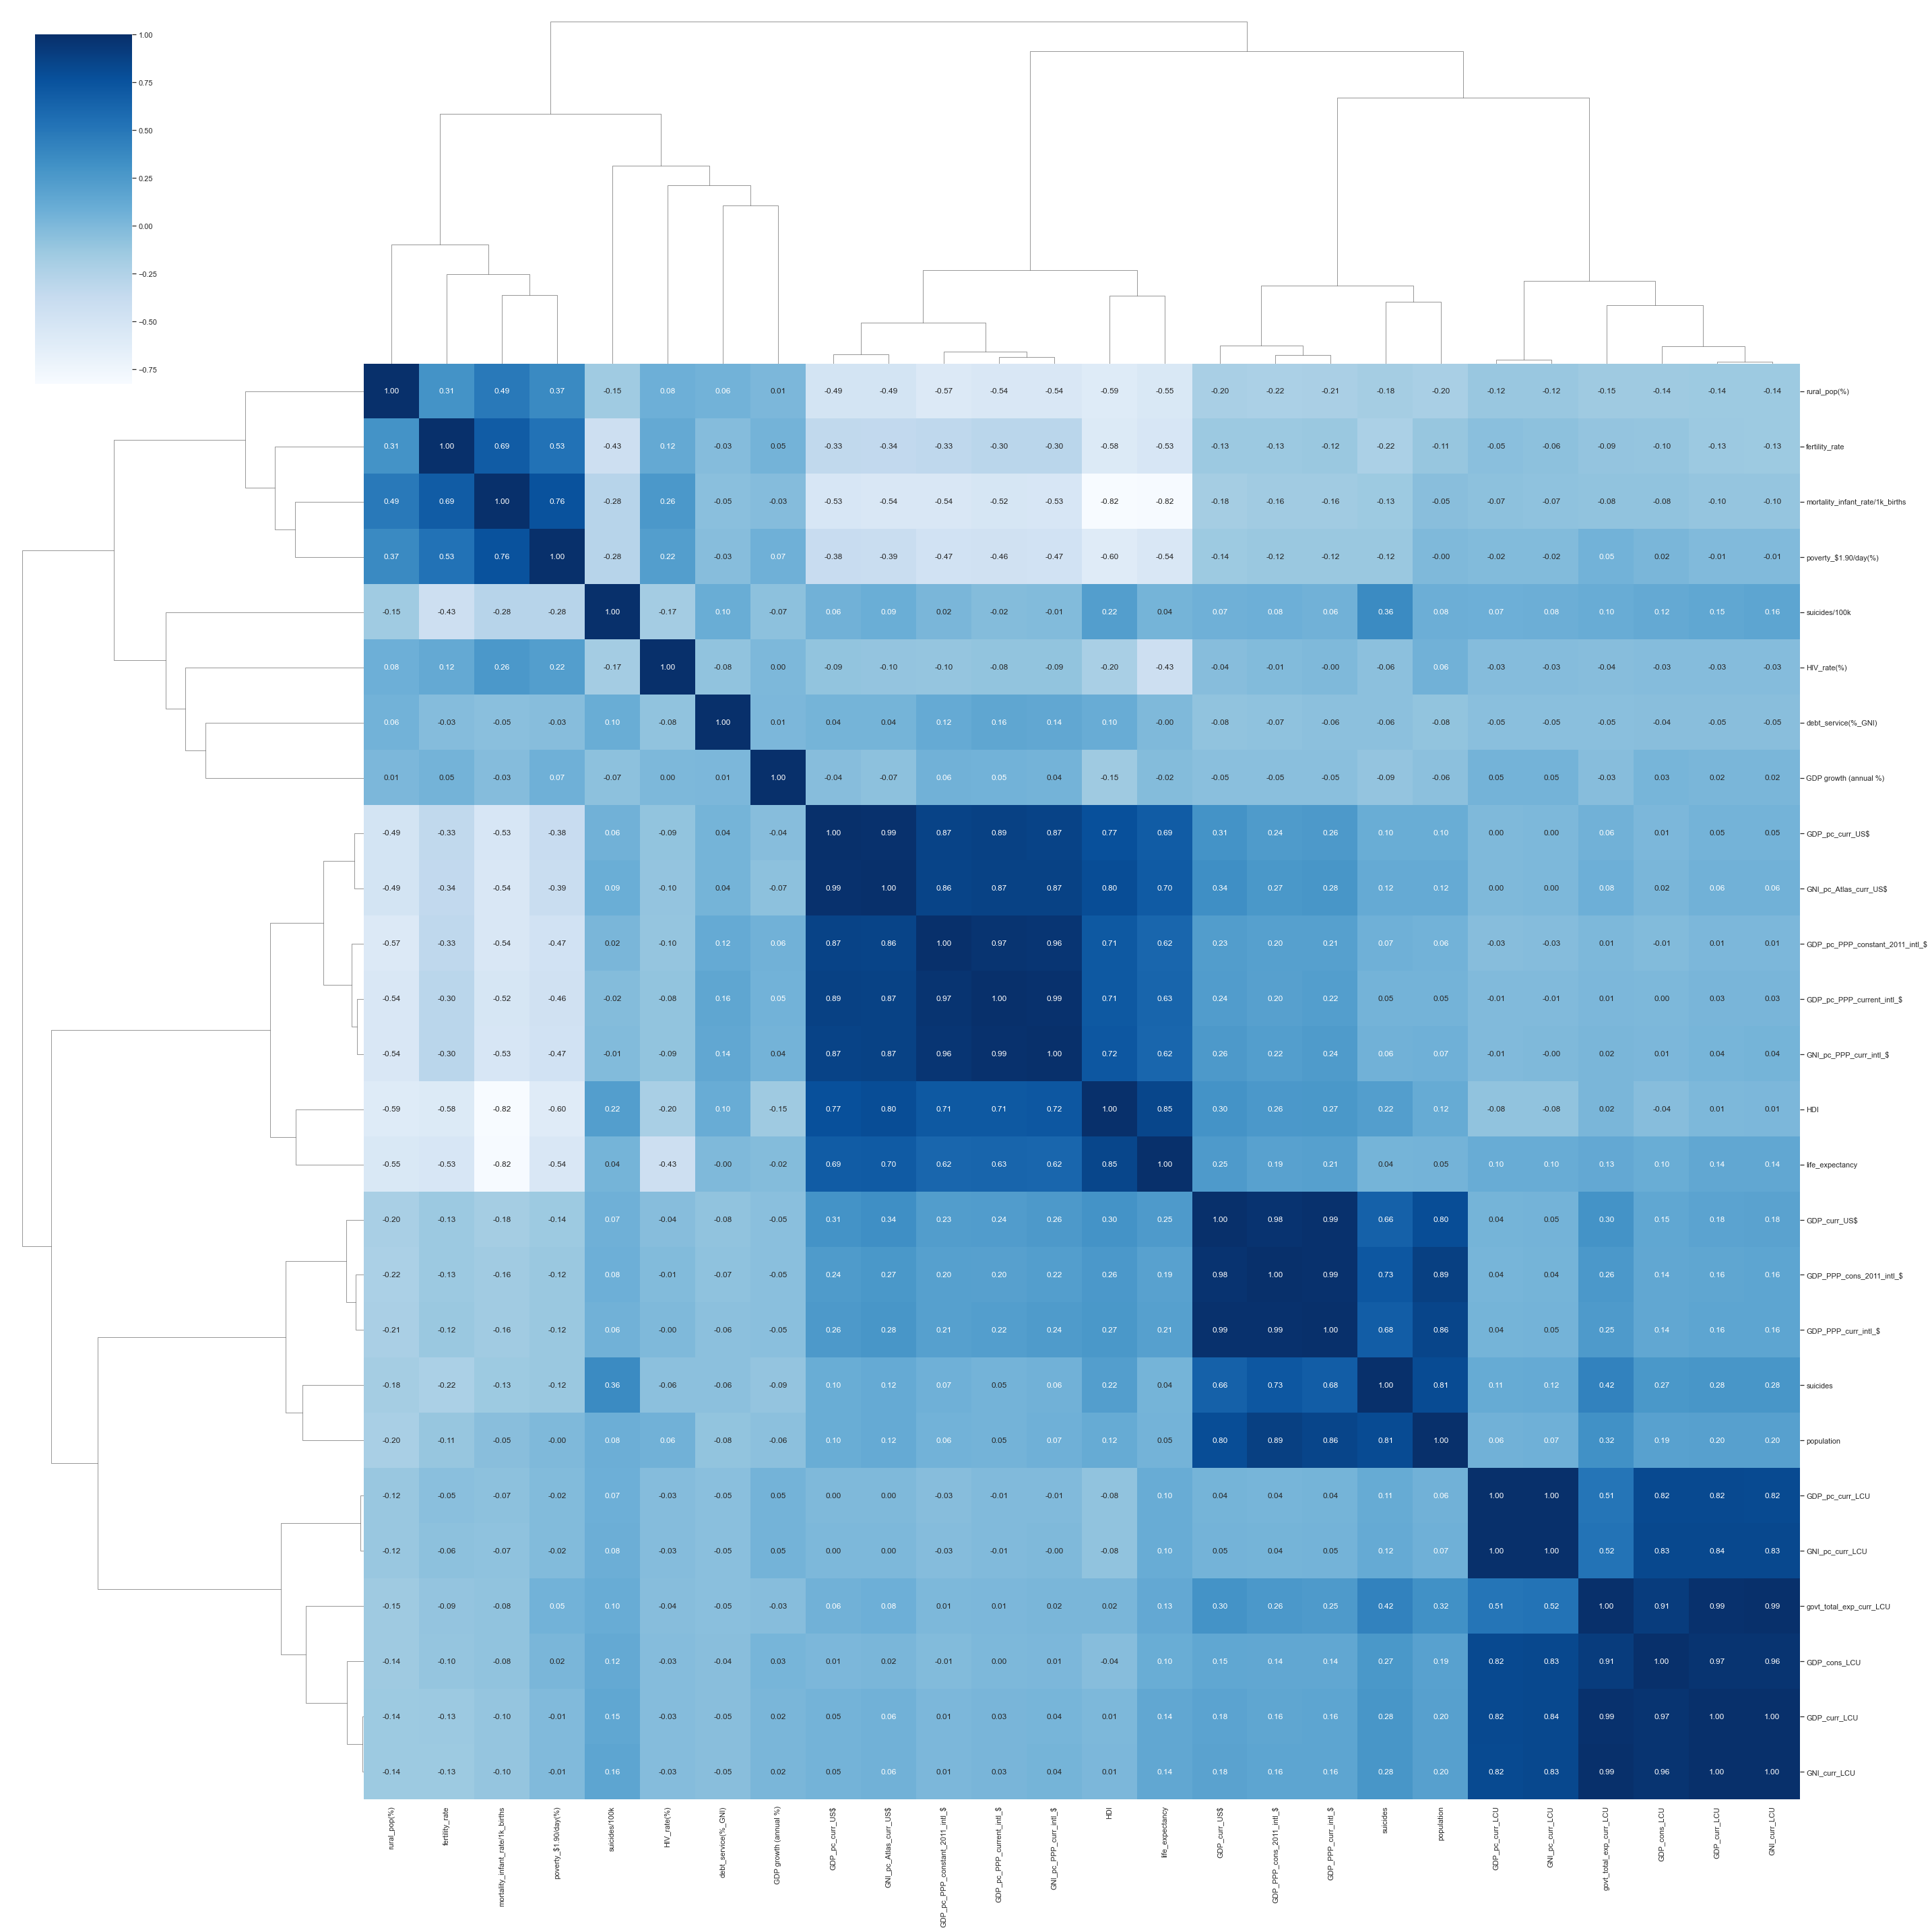

In [8]:
# add aggregation dictionary to a list comprehension
lc = {k:np.sum if k in {'suicides', 'population'} else np.mean for k in df.select_dtypes(include=[np.number]).columns}

# create a summary DataFrame
summary_df = df.groupby(['country', 'year']).agg(lc)
summary_df.reset_index(level=[1], inplace=True)
summary_df['suicides/100k'] = (summary_df['suicides'] / summary_df['population']) * 100000
summary_df.head(5)

sns.clustermap(summary_df.corr(), annot=True, fmt='.2f', cmap='Blues', figsize=(40,40))
plt.savefig('Images/clustermap.png')

#### Suicides vs Fertility Rate

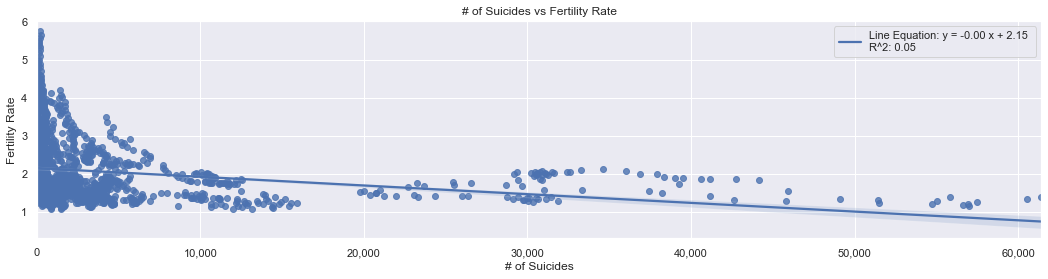

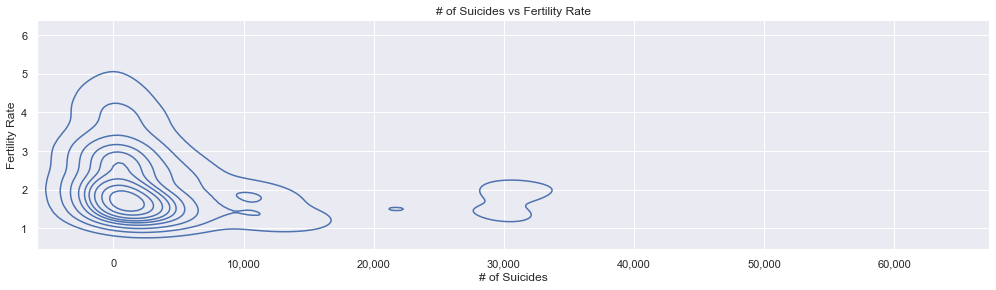

In [9]:
plot_df = summary_df[~(summary_df['fertility_rate'].isna())]

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = sts.linregress(plot_df['suicides'],plot_df['fertility_rate'])

# jointplot
plt.figure(figsize=(18,4))
sns.regplot(data=plot_df,
            x='suicides',
            y='fertility_rate',
            line_kws={'label':'Line Equation: y = {0:.2f} x + {1:.2f} \nR^2: {2:.2f}'.format(slope,intercept,r_value**2)})
plt.title('# of Suicides vs Fertility Rate')
plt.xlabel('# of Suicides')
plt.ylabel('Fertility Rate')
plt.legend()
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_fertilityrate.png")

plt.show()

# bivariate KDE plot
sns.displot(data=plot_df, x='suicides', y='fertility_rate', height=4, aspect=3.5, kind='kde')
plt.title('# of Suicides vs Fertility Rate')
plt.xlabel('# of Suicides')
plt.ylabel('Fertility Rate')
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_fertilityrate_kde.png")

plt.show()

#### Suicides vs Life Expectancy

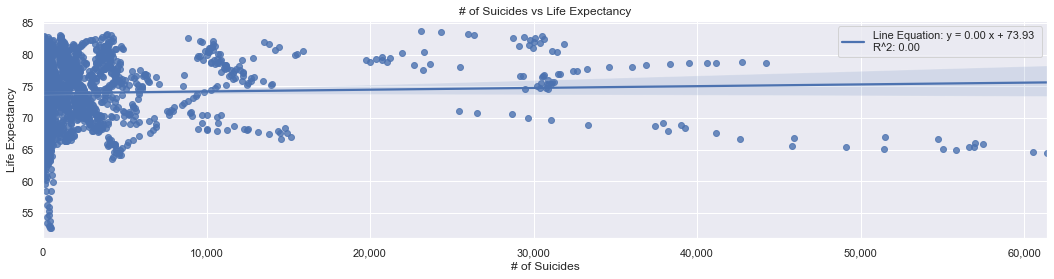

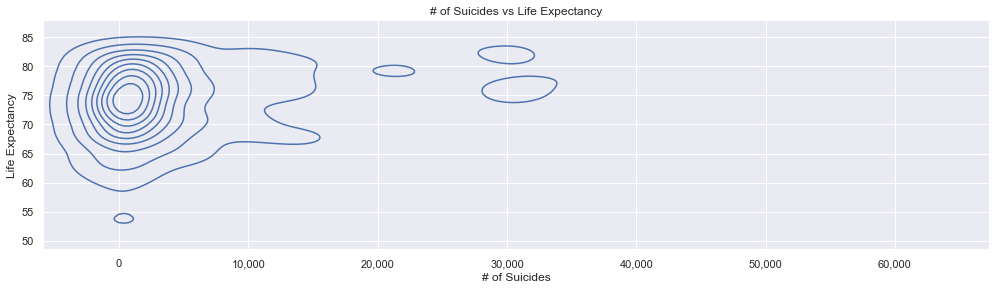

In [10]:
plot_df = summary_df[~(summary_df['life_expectancy'].isna())]
 
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = sts.linregress(plot_df['suicides'],plot_df['life_expectancy'])

# jointplot
plt.figure(figsize=(18,4))
sns.regplot(data=plot_df,
            x='suicides',
            y='life_expectancy',
            line_kws={'label':'Line Equation: y = {0:.2f} x + {1:.2f} \nR^2: {2:.2f}'.format(slope,intercept,r_value**2)})
plt.title('# of Suicides vs Life Expectancy')
plt.xlabel('# of Suicides')
plt.ylabel('Life Expectancy')
plt.legend()
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_lifeexpectancy.png")

plt.show()

# bivariate KDE plot
sns.displot(data=plot_df, x='suicides', y='life_expectancy', height=4, aspect=3.5, kind='kde')
plt.title('# of Suicides vs Life Expectancy')
plt.xlabel('# of Suicides')
plt.ylabel('Life Expectancy')
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_lifeexpectancy_kde.png")

plt.show()

#### Suicides vs HIV Rate

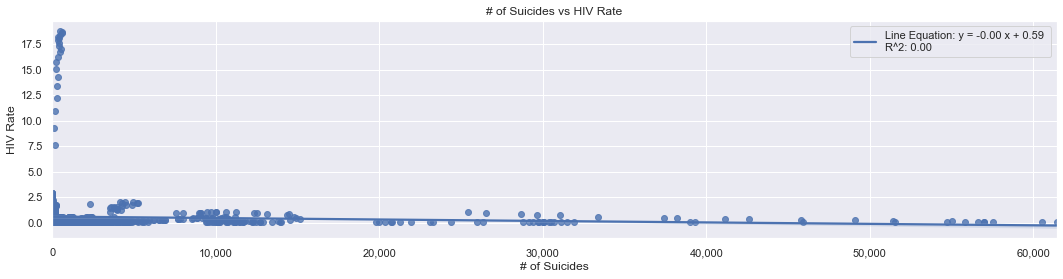

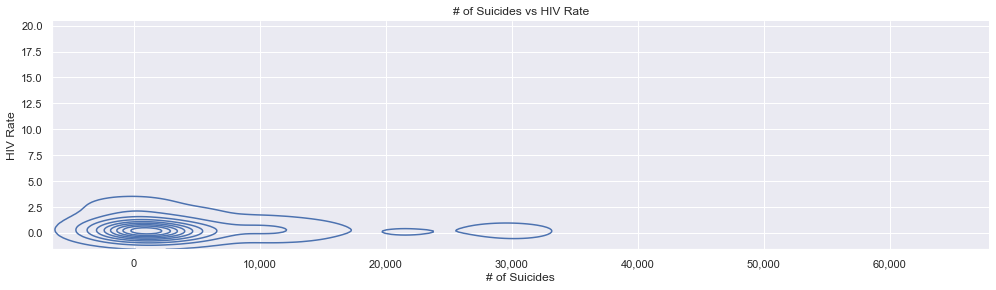

In [11]:
plot_df = summary_df[~(summary_df['HIV_rate(%)'].isna())]
 
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = sts.linregress(plot_df['suicides'],plot_df['HIV_rate(%)'])

# jointplot
plt.figure(figsize=(18,4))
sns.regplot(data=plot_df,
            x='suicides',
            y='HIV_rate(%)',
            line_kws={'label':'Line Equation: y = {0:.2f} x + {1:.2f} \nR^2: {2:.2f}'.format(slope,intercept,r_value**2)})
plt.title('# of Suicides vs HIV Rate')
plt.xlabel('# of Suicides')
plt.ylabel('HIV Rate')
plt.legend()
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_HIVrate.png")

plt.show()

# bivariate KDE plot
sns.displot(data=plot_df, x='suicides', y='HIV_rate(%)', height=4, aspect=3.5, kind='kde')
plt.title('# of Suicides vs HIV Rate')
plt.xlabel('# of Suicides')
plt.ylabel('HIV Rate')
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_HIVrate_kde.png")

plt.show()

#### Suicides vs GDP PPP (constant 2011 international $)

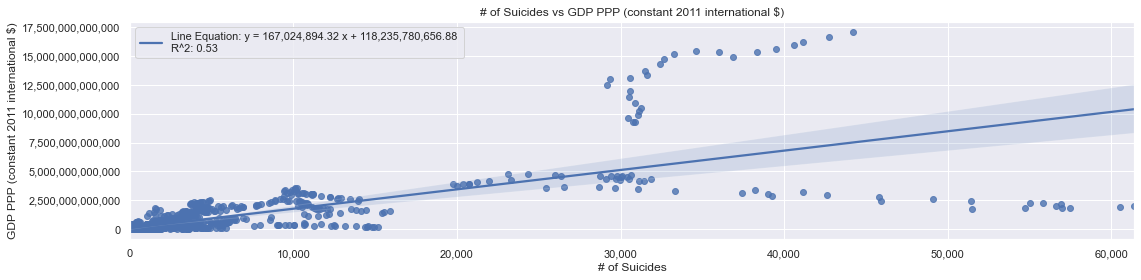

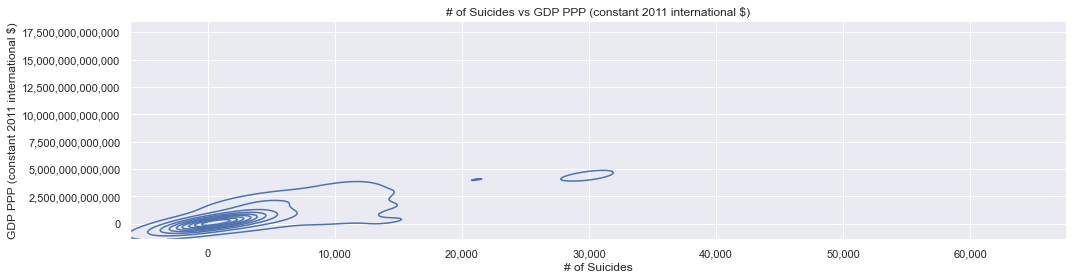

In [12]:
# PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. 
# An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States.

plot_df = summary_df[~(summary_df['GDP_PPP_cons_2011_intl_$'].isna())]
 
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = sts.linregress(plot_df['suicides'],plot_df['GDP_PPP_cons_2011_intl_$'])

# jointplot
plt.figure(figsize=(18,4))
sns.regplot(data=plot_df,
            x='suicides',
            y='GDP_PPP_cons_2011_intl_$',
            line_kws={'label':'Line Equation: y = {0:,.2f} x + {1:,.2f} \nR^2: {2:,.2f}'.format(slope,intercept,r_value**2)})
plt.title('# of Suicides vs GDP PPP (constant 2011 international $)')
plt.xlabel('# of Suicides')
plt.ylabel('GDP PPP (constant 2011 international $)')
plt.legend()
# add format to x-axis and y-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_GDP_PPP.png")

plt.show()

# bivariate KDE plot
sns.displot(data=plot_df, x='suicides', y='GDP_PPP_cons_2011_intl_$', height=4, aspect=3.5, kind='kde')
plt.title('# of Suicides vs GDP PPP (constant 2011 international $)')
plt.xlabel('# of Suicides')
plt.ylabel('GDP PPP (constant 2011 international $)')
# add format to x-axis and y-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_vs_GDP_PPP_kde.png")

plt.show()

#### Suicides by Age Group and Sex

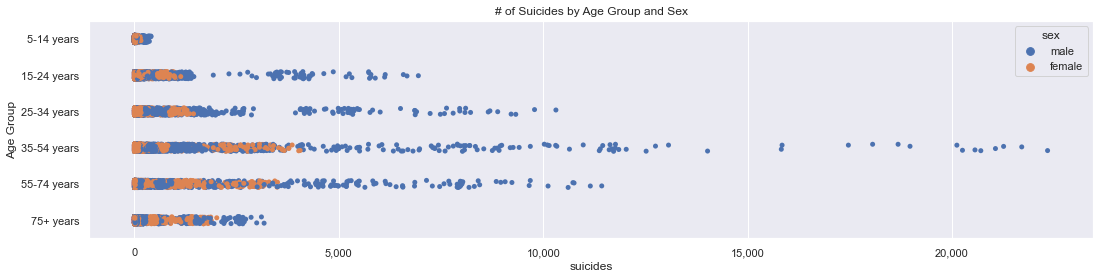

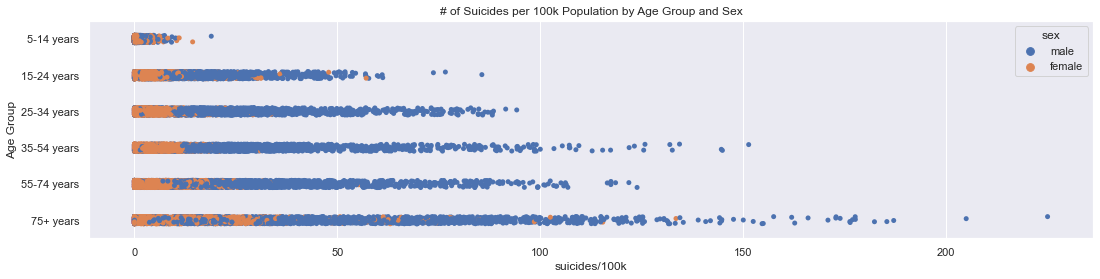

In [13]:
# copy DataFrame
plot_df = df.copy()

# create an order for Seaborn plot
order = ['5-14 years',
         '15-24 years',
         '25-34 years',
         '35-54 years',
         '55-74 years',
         '75+ years']

hue_order = ['male', 'female']

plt.figure(figsize=(18,4))
sns.stripplot(data=plot_df, y='age', x='suicides', jitter=True, hue='sex', hue_order=hue_order, order=order)
plt.title('# of Suicides by Age Group and Sex')
plt.ylabel('Age Group')
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_age_sex.png")

plt.show()

plt.figure(figsize=(18,4))
sns.stripplot(data=plot_df, y='age', x='suicides/100k', jitter=True, hue='sex', hue_order=hue_order, order=order)
plt.title('# of Suicides per 100k Population by Age Group and Sex')
plt.ylabel('Age Group')
# add format to x-axis
plt.gca().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Images/suicides_age_sex_hue.png")

plt.show()